<a href="https://colab.research.google.com/github/ameyadalvi84/Keras/blob/master/MNIST_Dataset_Analysis_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST** Dataset from Keras

In [2]:
import keras as K

Using TensorFlow backend.


In [0]:
from keras.datasets import mnist

In [0]:
import numpy as np

Loading the MNIST data set into train and test data set

In [5]:
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


doing basic checks on data (EDA kind of)

In [6]:
print("length of Train_images : ",len(train_images))
print("Shape of Train_images : ",train_images.shape)
print("length of Test_images : ",len(test_images))
print("Shape of Test_images : ",test_images.shape)

length of Train_images :  60000
Shape of Train_images :  (60000, 28, 28)
length of Test_images :  10000
Shape of Test_images :  (10000, 28, 28)


plotting few images of MNIST data

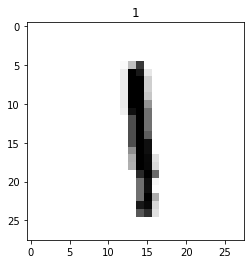

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

indx = 8
data = train_images[indx]
plt.imshow(data,cmap = plt.cm.binary)
plt.title(train_labels[indx])
plt.show()

Converting Label data to categorical values

In [0]:
from keras.utils import to_categorical

train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

In [9]:
print(train_labels_categorical[indx])
print(train_labels[indx])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
1


Creating Keras Model

In [0]:
from keras import models
from keras import layers


def build_model():
  model = models.Sequential()
  model.add(layers.Dense(32,activation='relu', input_shape=(28*28,)))
  model.add(layers.Dense(16,activation='relu'))
  model.add(layers.Dense(10,activation = 'softmax'))
  model.compile(optimizer='rmsprop',loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model

Normalizing and reshaping data

In [11]:
train_images = train_images.reshape((train_images.shape[0],train_images.shape[1]*train_images.shape[2]))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0],test_images.shape[1]*test_images.shape[2]))
test_images = test_images.astype('float32') / 255

print(train_images.shape)
#print(train_images[indx])
print(test_images.shape)
#print(test_images[indx])

(60000, 784)
(10000, 784)


In [16]:
model1 = build_model()
history = model1.fit(train_images,train_labels_categorical,epochs=25,batch_size=128)

Epoch 1/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.4913 - accuracy: 0.8687
Epoch 2/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.2403 - accuracy: 0.9321
Epoch 3/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.1961 - accuracy: 0.9437
Epoch 4/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.1707 - accuracy: 0.9516
Epoch 5/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.1532 - accuracy: 0.9563
Epoch 6/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.1393 - accuracy: 0.9597
Epoch 7/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.1288 - accuracy: 0.9624
Epoch 8/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.1197 - accuracy: 0.9653
Epoch 9/25
60000/60000 [==============================] - 1s 22us/step - loss: 0.1122 - accuracy: 0.9679
Epoch 10/25
60000/60000 [==============================

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy'])

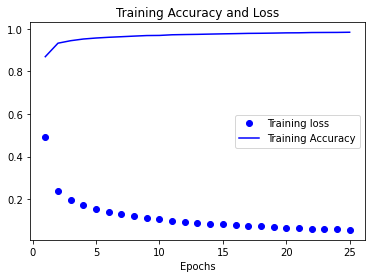

In [18]:
loss_val  = history_dict['loss']
acc_val = history_dict['accuracy']

epochs = range(1, len(acc_val)+1)

plt.plot(epochs,loss_val,'bo',label='Training loss')
plt.plot(epochs,acc_val,'b',label='Training Accuracy')
plt.title("Training Accuracy and Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show()

Creating validation data set and testing accuracy and loss on both training and validation data set

In [19]:
#amount of data needed in validation set
valid = 10000
val_images = train_images[:valid]
partial_train_images = train_images[valid:]
val_labels = train_labels_categorical[:valid]
partial_train_labels = train_labels_categorical[valid:]

print("length of validation data set : ", len(val_images))
print("Shape of validation data set : ", val_images.shape)

length of validation data set :  10000
Shape of validation data set :  (10000, 784)


In [20]:
history_val = model1.fit(partial_train_images,
                         partial_train_labels,
                         batch_size = 128,
                         epochs = 25,
                         validation_data = (val_images,val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 1s 26us/step - loss: 0.0539 - accuracy: 0.9842 - val_loss: 0.0552 - val_accuracy: 0.9831
Epoch 2/25
50000/50000 [==============================] - 1s 25us/step - loss: 0.0516 - accuracy: 0.9847 - val_loss: 0.0693 - val_accuracy: 0.9796
Epoch 3/25
50000/50000 [==============================] - 1s 25us/step - loss: 0.0498 - accuracy: 0.9856 - val_loss: 0.0668 - val_accuracy: 0.9798
Epoch 4/25
50000/50000 [==============================] - 1s 25us/step - loss: 0.0472 - accuracy: 0.9863 - val_loss: 0.0744 - val_accuracy: 0.9777
Epoch 5/25
50000/50000 [==============================] - 1s 25us/step - loss: 0.0450 - accuracy: 0.9871 - val_loss: 0.0679 - val_accuracy: 0.9801
Epoch 6/25
50000/50000 [==============================] - 1s 25us/step - loss: 0.0445 - accuracy: 0.9869 - val_loss: 0.0683 - val_accuracy: 0.9790
Epoch 7/25
50000/50000 [==============================] - 1s 25us/st

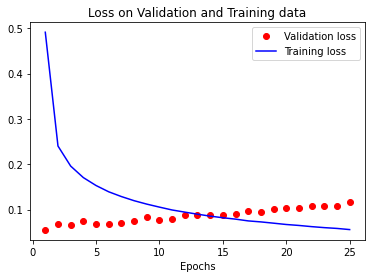

In [24]:
history_val_dict = history_val.history
history_val_dict.keys()
loss_val  = history_val_dict['val_loss']
loss_train = history_dict['loss']

epochs = range(1, len(loss_train)+1)

plt.plot(epochs,loss_val,'ro',label='Validation loss')
plt.plot(epochs,loss_train,'b',label='Training loss')
plt.title("Loss on Validation and Training data")
plt.xlabel("Epochs")
plt.legend()
plt.show()

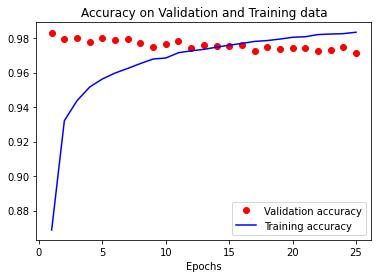

In [25]:
acc_val  = history_val_dict['val_accuracy']
acc_train = history_dict['accuracy']

epochs = range(1, len(acc_train)+1)

plt.plot(epochs,acc_val,'ro',label='Validation accuracy')
plt.plot(epochs,acc_train,'b',label='Training accuracy')
plt.title("Accuracy on Validation and Training data")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [27]:
final_model = model1.fit(partial_train_images,partial_train_labels,
                         batch_size = 128,
                         epochs = 15,
                         validation_data=(val_images,val_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 1s 26us/step - loss: 0.0212 - accuracy: 0.9940 - val_loss: 0.1107 - val_accuracy: 0.9732
Epoch 2/15
50000/50000 [==============================] - 1s 24us/step - loss: 0.0204 - accuracy: 0.9944 - val_loss: 0.1218 - val_accuracy: 0.9724
Epoch 3/15
50000/50000 [==============================] - 1s 24us/step - loss: 0.0198 - accuracy: 0.9942 - val_loss: 0.1153 - val_accuracy: 0.9734
Epoch 4/15
50000/50000 [==============================] - 1s 24us/step - loss: 0.0194 - accuracy: 0.9942 - val_loss: 0.1180 - val_accuracy: 0.9734
Epoch 5/15
50000/50000 [==============================] - 1s 25us/step - loss: 0.0182 - accuracy: 0.9948 - val_loss: 0.1297 - val_accuracy: 0.9704
Epoch 6/15
50000/50000 [==============================] - 1s 24us/step - loss: 0.0171 - accuracy: 0.9951 - val_loss: 0.1225 - val_accuracy: 0.9732
Epoch 7/15
50000/50000 [==============================] - 1s 25us/st

In [28]:
result = model1.evaluate(test_images,test_labels_categorical)

10000/10000 [==============================] - 0s 49us/step


In [29]:
result

[0.20052961343411513, 0.9657999873161316]

In [0]:
Y_pred = model1.predict(test_images)

In [0]:
y_pred = np.argmax(Y_pred,axis=1)

In [34]:
from sklearn.metrics import confusion_matrix,classification_report

print("Confusion Matrix")
print(confusion_matrix(test_labels,y_pred))

Confusion Matrix
[[ 960    1    2    2    5    1    4    2    3    0]
 [   1 1120    4    1    0    0    2    1    6    0]
 [   1    4  993    3    3    0   10   12    5    1]
 [   0    0    7  984    1    6    0    7    5    0]
 [   0    4    4    2  945    0    9    8    1    9]
 [   2    0    0   12    2  852    8    2   13    1]
 [   6    2    4    0    5    5  934    0    2    0]
 [   1    5   13    6    1    1    0  994    1    6]
 [   2    1   11    9    5    3   10    5  923    5]
 [   2    7    0    9    9    9    0   14    6  953]]


In [35]:
print(classification_report(test_labels,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.96      0.97       982
           5       0.97      0.96      0.96       892
           6       0.96      0.97      0.97       958
           7       0.95      0.97      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

